In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


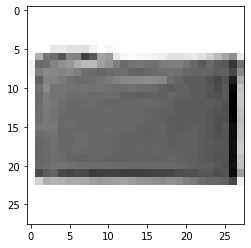

In [5]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

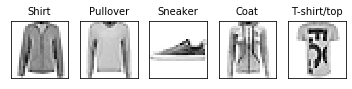

In [6]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [7]:
# 觀察資料幾筆

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  66,  64,
         16,  11,  18,  69,  63,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  41,  92, 116, 113, 137,
        120, 109, 116, 127, 116, 124, 105,  59,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  27, 120, 134, 116, 110,  97, 107,
        101,  90, 115, 104,  98, 105, 111, 129, 124,  33,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  32, 118, 106, 100,  85,  65,  62,  55,
         55,  60,  57,  59,  69,  82,  92,  98, 100, 118,  26,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  91, 100,  91,  82, 118, 178, 155, 160,
        180, 184, 174, 161, 129, 144, 101,  85,  90, 110,  84,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 109,  98,  97,  63, 157, 253, 241, 246,
        237, 233, 255, 255, 209, 227, 109,  71,  98, 102, 102,   0,   0,
          0,   0],
       [  

In [11]:
np.max(x_train[n]) #最大像素

255

In [12]:
print(set(y_train))#有幾類

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [13]:
#處理資料

In [14]:
x_train=x_train.reshape(60000,784)/255
x_test=x_test.reshape(10000,784)/255

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
y_train[9487]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
#建神經

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
model = Sequential()

In [21]:
model.add(Dense(50, input_dim=784, activation='relu'))

In [22]:
model.add(Dense(38, activation='relu'))

In [23]:
model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(loss='mse', optimizer=SGD(lr=0.025), metrics=['accuracy'])

In [25]:
model.summary() #看模型的結構

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 38)                1938      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                390       
Total params: 41,578
Trainable params: 41,578
Non-trainable params: 0
_________________________________________________________________


In [26]:
#訓練資料

In [27]:
model.fit(x_train, y_train, batch_size=20, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0678 - accuracy: 0.5051
Epoch 2/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0414 - accuracy: 0.7275
Epoch 3/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0330 - accuracy: 0.7833
Epoch 4/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0293 - accuracy: 0.8047
Epoch 5/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0273 - accuracy: 0.8165
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0259 - accuracy: 0.8248
Epoch 7/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0249 - accuracy: 0.8300
Epoch 8/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0242 - accuracy: 0.8367
Epoch 9/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0236 - accuracy: 0.8402
Epoch

In [28]:
#結果

In [29]:
result = model.predict_classes(x_test)

神經網路預測是: Shirt


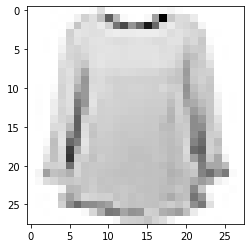

In [41]:
n = 8787
print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')